In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

# Predicting Medical Costs with Linear Regression

## Data Collection

Medical insurance companies provide coverage to customers based on their predicted yearly medical costs. For example, people under the age of 30 typically have lower insurance costs than people over the age of 60 because they seek less medical care throughout the year. Insurance companies can evaluate an individual's annual insurance premium based on many factors like age, sex, and smoking habits. 

The dataset used in this project was collected by an insurance company called ACME. Each of the 1338 rows represents an individual covered by ACME Insurance Inc.. 6 of the columns contain information on the individual: age, sex, bmi, number of children, smoker, and region. The 7th column contains the individuals' previous year's medical expenditures. 

Learn more about the data [here](https://www.kaggle.com/datasets/harshsingh2209/medical-insurance-payout).

## Goal

The goal of this project is to build a linear regression model that predicts an individual’s yearly medical costs based on their background information. A successful model should explain at least 70% of the variability in annual expenses. Such a model could be used by ACME Inc. to estimate monthly premium charges for new customers.

## Data Cleaning

In [60]:
df = pd.read_csv('expenses.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Regression models require numeric predictors, so I will convert non-numeric columns.

In [62]:
df['sex'] = np.where(df['sex'] == 'female', 1, 0) 
df['smoker'] = np.where(df['smoker'] == 'yes', 1, 0) 
df['region'] = df['region'].replace({'northeast': 0, 'southeast': 1,
                                     'southwest': 2, 'northwest': 3})

New encodings:
- sex: 0 for males, 1 for females
- smoker: 0 for no, 1 for yes
- region: 0 for northeast, 1 for southeast, 2 for southwest, 3 for northwest

## Can annual expenditure be predicted by a customer's age? (Simple Linear Model)

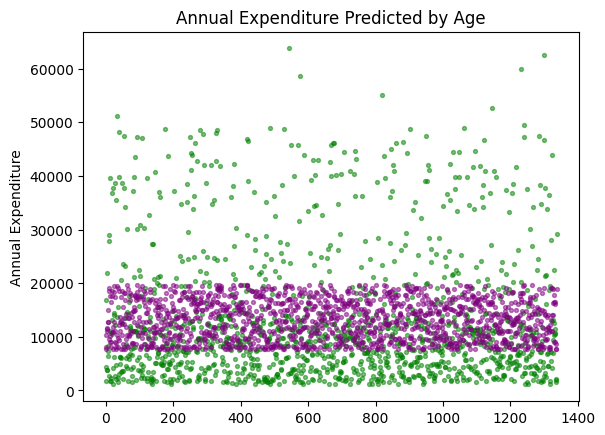

In [63]:
## fit simple linear model and make predictions 
X = df[['age']]
y = df['charges']
model1 = LinearRegression() # create model instance
model1.fit(X, y) # fit model 
preds1 = model1.predict(X)

## plot predicted v actual expenditures 
plt.scatter(range(len(df)), y, c = 'green', s = 8, alpha = 0.5)
plt.scatter(range(len(df)), preds1, c = 'purple', s = 8, alpha = 0.5)
plt.ylabel('Annual Expenditure')
plt.title('Annual Expenditure Predicted by Age');

With actual values in green and predicted values in purple, it is clear to see that a simple linear model using age as the predictor performs poorly in predicting individuals' annual medical costs. 

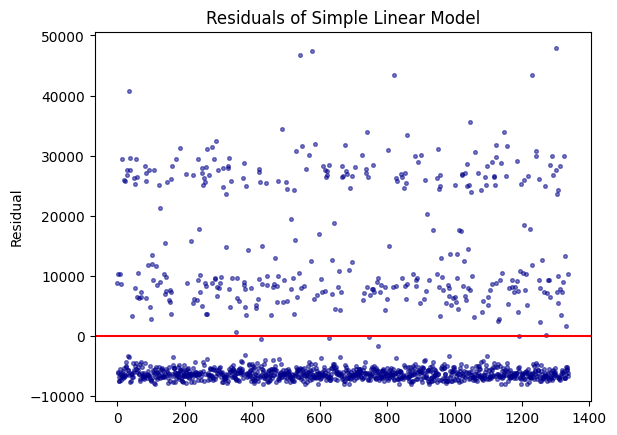

In [64]:
residuals = y - preds1
plt.scatter(range(len(y)), residuals, s = 7, alpha = 0.5, c = 'darkblue')
plt.axhline(0, color = 'red')
plt.title('Residuals of Simple Linear Model')
plt.ylabel('Residual');

If regressing on age was enough to capture the variability in annual expenses, the residuals would be evenly distributed around 0. However, the residuals are positively skewed, indicating the requirement for a more complex model. 

In [65]:
print('R-Squared of Simple Linear Model = ', round(model1.score(X, y), 4))

R-Squared of Simple Linear Model =  0.0894


**No, annual expenditure cannot be predicted by an individual's age alone.** With an R-squared of just 0.089, I can confidently conclude that age is not sufficient for predicting annual expenses. The model explains very little of the variability in medical costs and performs almost as poorly as the mean. 

## Are all 6 customer features sufficient for predicting yearly medical costs? (Multiple Linear Model)

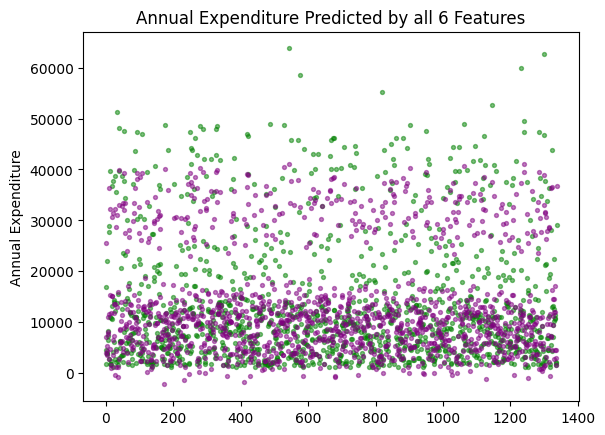

In [66]:
## fit multiple linear model and make predictions 
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
model2 = LinearRegression() # create model instance
model2.fit(X, y) # fit model 
preds2 = model2.predict(X)

## plot predicted v actual expenditures 
plt.scatter(range(len(df)), y, c = 'green', s = 8, alpha = 0.5)
plt.scatter(range(len(df)), preds2, c = 'purple', s = 8, alpha = 0.5)
plt.ylabel('Annual Expenditure')
plt.title('Annual Expenditure Predicted by all 6 Features');

Again, actual values are in green and predicted values in purple. It is evident by this plot that incorporating all 6 features into the model greatly improved it's predictive power. The model seems to have captured much more variability in the data and much les resembles a simple mean prediction. 

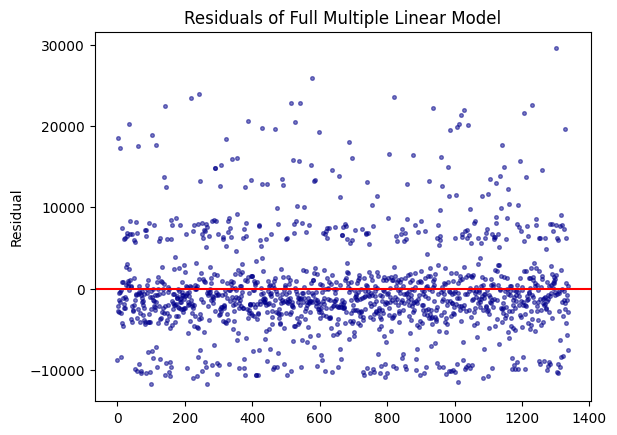

In [67]:
residuals = y - preds2
plt.scatter(range(len(y)), residuals, s = 7, alpha = 0.5, c = 'darkblue')
plt.axhline(0, color = 'red')
plt.title('Residuals of Full Multiple Linear Model')
plt.ylabel('Residual');

This residual plot looks much more promising, with values fairly evenly distributed around 0 with no clear pattern. 

In [68]:
print('R-Squared of Full Multiple Linear Model =', round(model2.score(X, y), 4))

R-Squared of Full Multiple Linear Model = 0.7498


**Using all 6 features in the regression model successfully explains more than 70% of the variability in annual medical costs.** In fact, the full multiple linear model explains almost 75% of the variability in expenses. Although this model is sufficient, I want to test the trade-off between model complexity and model fit to ensure ACME Inc. employs the optimal model for their company and customers. 

## Are all the predictors contributing signifigantly to the model? (Feature Selection) 

It is possible that I could remove some of the features from the full linear model with minimal loss in predictive power. To evaluate this possibility, I will train 6 models, each one excluding a different feature and evalutate it's fit using R-squared. 

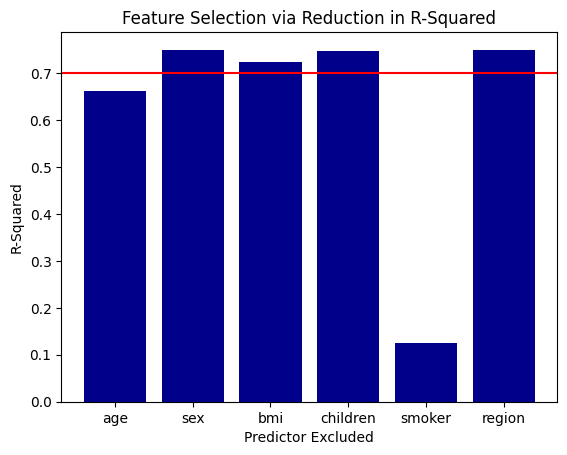

In [69]:
rsqs = []
labels = []
predictors = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
for i in range(6):
    labels.append(predictors[i])
    predictors_subset = predictors[:i] + predictors[i+1:]
    X = df[predictors_subset]
    model = LinearRegression().fit(X, y)
    rsqs.append(model.score(X, y))
plt.bar(x = labels, height = rsqs, color = 'darkblue')
plt.axhline(.7, color = 'red')
plt.xlabel('Predictor Excluded')
plt.ylabel('R-Squared')
plt.title('Feature Selection via Reduction in R-Squared');

The only 2 features which are required to produce a model which explains greater than 70% of the variability in annual expenses are age and smoker status. 

In [70]:
X = df[['smoker', 'age']] 
model = LinearRegression().fit(X, y) 
print('R-Squared of Reduced Multiple Linear Model =', round(model.score(X, y), 4))

R-Squared of Reduced Multiple Linear Model = 0.7214


In [71]:
model.coef_

array([23855.30481666,   274.87118587])

In [72]:
model.intercept_

-2391.6263593585754

**Indeed, just individuals' ages and smoker statuses can explain more than 70% of the variability in annual medical costs.**

## Conclusion

- The final regression model is: $AnnualMedicalExpenses = 23855.3*SmokerStatus + 274.87*Age - 2391.63$ where SmokerStatus = 0 for non-smokers and 1 for smokers.
- The expected monthly premium can be computed as: $MonthlyPremium = AnnualMedicalExpenses / 12$
- This model allows ACME Inc. to quickly estimate medical costs and assign premiums for new customers based on only two pieces of information: age and smoking status.
- Because the model explains more than 70% of the variation in annual expenses, ACME Inc. and their customers can be confident that the premiums are fair, data-driven, and reasonably accurate.